In [1]:
from dataset import CustomNPZDataset, HFDataset, SSLDataset
from dataset import get_medmnist_transforms, plot_views, plot_ssl_views


import numpy as np
data_path = '../data/pneumoniamnist_224.npz'
size = 224

In [6]:
# For SSL

# Note: For SSL, we pass None as transform to base dataset because
# SSLDataset wrapper handles the transforms (generating 2 views).
# For Supervised, we pass the transform directly.
train_base = CustomNPZDataset(data_path, split='train', transform=None)
val_base = CustomNPZDataset(data_path, split='val', transform=None)
test_base = CustomNPZDataset(data_path, split='test', transform=None)

# Wrap with SSL dataset
transform = get_medmnist_transforms(size=size, augment=True)

train_set = SSLDataset(train_base, transform)
val_set = SSLDataset(val_base, transform)  # Usually SSL is only trained on train_set
test_set = SSLDataset(test_base, transform)

train_set = HFDataset(train_set, for_ssl=True)
val_set = HFDataset(val_set, for_ssl=True)
test_set = HFDataset(test_set, for_ssl=True)

print(f"Train: {len(train_set)}, Val: {len(val_set)}, Test: {len(test_set)}")
# print(f"Shapes: {train_set[0]['view1'].shape}, {train_set[0]['view2'].shape}")

Train: 4708, Val: 524, Test: 624


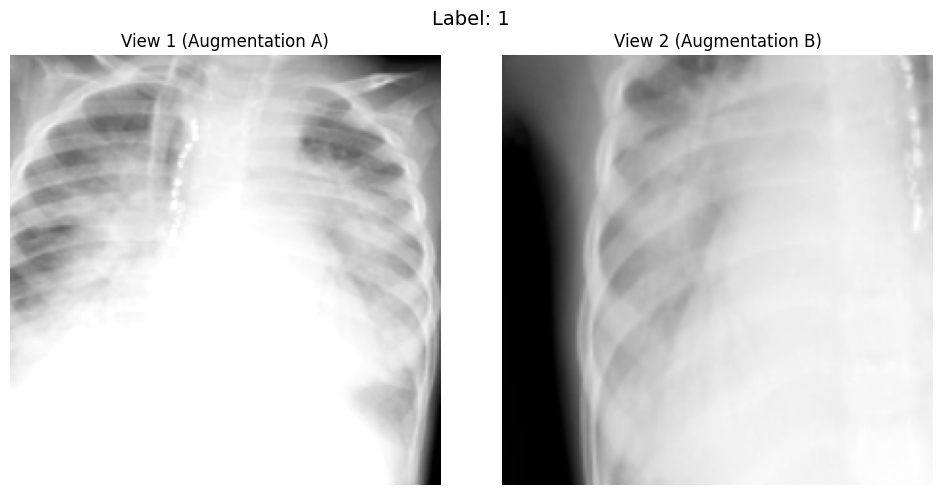

In [15]:
plot_ssl_views(train_set[np.random.randint(0, len(train_set))])

In [4]:
# For SFT
transform = get_medmnist_transforms(size=size, augment=False)

train_base = CustomNPZDataset(data_path, split='train', transform=transform)
val_base = CustomNPZDataset(data_path, split='val', transform=transform)
test_base = CustomNPZDataset(data_path, split='test', transform=transform)

train_set = HFDataset(train_base, for_ssl=False)
val_set = HFDataset(val_base, for_ssl=False)
test_set = HFDataset(test_base, for_ssl=False)

print(f"Train: {len(train_set)}, Val: {len(val_set)}, Test: {len(test_set)}")


Train: 4708, Val: 524, Test: 624


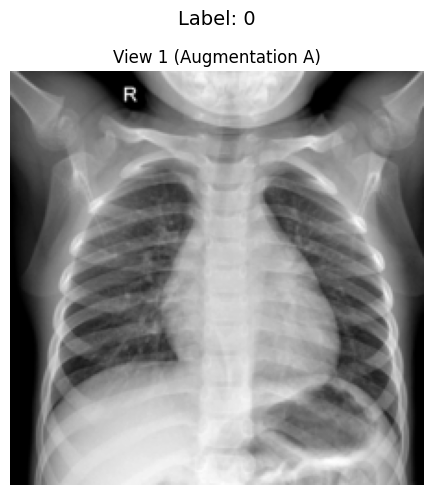

In [5]:
plot_views(train_set[np.random.randint(0, len(train_set))])